#Importation des bibliothèques

In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd #Lecture des fichiers csv,etc.
import warnings 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore') #Eviter d'afficher des warnings
import joblib


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
import os
os.listdir("./")


['API.py',
 'Assets',
 'Bank_Credit_Risk.ipynb',
 'Documentation.docx',
 'german_credit_data.csv',
 'import requests.py',
 'Labels.txt',
 'model.pkl',
 '__pycache__',
 '~$cumentation.docx',
 '~WRL2941.tmp']

In [3]:
churn=pd.read_csv('./german_credit_data.csv',sep=',',header=0) 
churn.head(3) 


,Unnamed: 0,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [5]:
print (churn.shape)
data={'Age': [67], 'Sex': ['male'],'Job': [2] , 'Housing' : ['own'],'Saving_accounts' : ['NaN'] , 'Checking_account' : ['little'] , 'Credit_amount' : [1169] , 'Duration' : [6] , 'Purpose' : ['radio/TV']}  
df = pd.DataFrame(data)

(1000, 11)


In [96]:
def trans(p,b):
    le = LabelEncoder()
    p.Sex = le.fit_transform(p.Sex)
    p.Housing = le.fit_transform(p.Housing)
    p.Saving_accounts = le.fit_transform(p.Saving_accounts)
    p.Checking_account = le.fit_transform(p.Checking_account)
    p.Purpose = le.fit_transform(p.Purpose)
    if b == False:
        p.Risk = le.fit_transform(p.Risk)
        return p 
    else:
        xx = np.array(p)
        return xx




In [97]:
churn = trans(churn,False)
X=churn.iloc[:,1:10].values
print(X)
#on prend toutes les lignes, on va prendre de 1 à 10
Y=churn.iloc[:,10].values  
print(Y)
#pour les colonnes, la décomposition Que la 10ème colonne

[[   67     1     2     1     4     0  1169     6     5]
 [   22     0     2     1     0     1  5951    48     5]
 [   49     1     1     1     0     3  2096    12     3]
 [   45     1     2     0     0     0  7882    42     4]
 [   53     1     2     0     0     0  4870    24     1]
 [   35     1     1     0     4     3  9055    36     3]
 [   53     1     2     1     2     3  2835    24     4]
 [   35     1     3     2     0     1  6948    36     1]
 [   61     1     1     1     3     3  3059    12     5]
 [   28     1     3     1     0     1  5234    30     1]
 [   25     0     2     2     0     1  1295    12     1]
 [   24     0     2     2     0     0  4308    48     0]
 [   22     0     2     1     0     1  1567    12     5]
 [   60     1     1     1     0     0  1199    24     1]
 [   28     0     2     2     0     0  1403    15     1]
 [   32     0     1     1     1     0  1282    24     5]
 [   53     1     2     1     4     3  2424    24     5]
 [   25     1     2     1     4

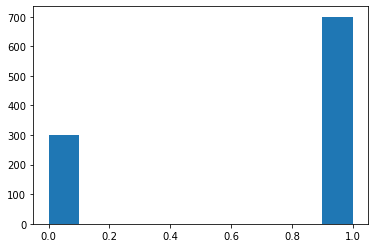

In [98]:
plt.hist(Y)
plt.show()

#Preparation de l'apprentissage

In [99]:
from sklearn.model_selection import train_test_split
#Importation des algorithmes 
from sklearn.tree import DecisionTreeClassifier #Arbre de decision
#Importation de Matrice de confusion 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

In [100]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.25,random_state=1)
#La base de test contiendra 25% des indiviuds de la base totale.

In [101]:
Xtest.shape

(250, 9)

#Apprentissage

In [102]:
DT=DecisionTreeClassifier(random_state=0, criterion='entropy') 


DT.fit(Xtrain,Ytrain) #Apprentissage


YDT=DT.predict(Xtest)#Prediction des clients 

print('Accuracy = {0:.3f}'.format(accuracy_score(Ytest,YDT)))
print('Recall = {0:.3f}'.format(recall_score(Ytest,YDT)))
print('Precision = {0:.3f}'.format(precision_score(Ytest,YDT)))



print('Matrice de confusion')
print(confusion_matrix(Ytest, YDT))

Accuracy = 0.696
Recall = 0.778
Precision = 0.787
Matrice de confusion
[[ 37  37]
 [ 39 137]]


In [106]:
x_test=trans(df,True)
print(x_test)
#x_test.reshape(-1,1)

YYDT=DT.predict(x_test)
print(YYDT)
joblib.dump(DT, 'model.pkl')

[[  67    0    2    0    0    0 1169    6    0]]
[1]


['model.pkl']